### Things I had to do in the terminal before being able to use this notebook


### Use conda to build Python env with osmnx as main so that not upto date version in dependancies used but workable for osmnx

conda config --prepend channels conda-forge

conda create -n ox --strict-channel-priority osmnx

### go into env
conda activate ox

### install other libs that are needed for visulization
conda install matplotlib
conda install numpy
conda install -c anaconda ipykernel

### makes conda env into a kernel which then can be used by jupyter notebook
python -m ipykernel install --user --name=ox

### other Tool for queries to OpenStreetMap in testing phase
pip install OSMPythonTools


# Notebook for all areas new in the gerda model mostly for vizualisation since assign_loaction function is the not area specific

In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

In [2]:
#not working for me actually 8892, 7days incidence = 34.74 2.11.2020
place_name_1 = "Bockhorn, Landkreis Friesland, Niedersachsen, 26345, Germany"
#agents: 7399 actually 12431, 7days incidence = 46.7 3.11.2020 
place_name_2 = "Hessisch Lichtenau, Werra-Meißner-Kreis, Regierungsbezirk Kassel, Hessen, 37235, Germany"
#agents: 7447 actually 8242 , 7days incidence = 52.0 3.11.2020
place_name_3 = "Oranienbaum-Wörlitz, Wittenberg, Sachsen-Anhalt, 06785, Germany"
#agents: 9548 actually 9882, 7days incidence = 149.0 2.11.2020
place_name_4 = "Linsengericht, Main-Kinzig-Kreis, Hessen, 63589, Germany"
#agents: 9339 actually 9954, 7days incidence = 287.2 2.11.2020
place_name_5 = "Simbach a.Inn, Landkreis Rottal-Inn, Bayern, 84359, Germany"



In [3]:
list_of_n_1 = [Point(8.0172, 53.39422),Point(7.99973, 53.3675)]
list_of_n_2 = [Point(9.70088,51.22621),Point(9.69110,51.21141),Point(9.72293,51.19661),Point(9.76303,51.17931),Point(9.79662,51.21392),Point(9.82794,51.20514),Point(9.64599,51.19812)]
list_of_n_3 = [Point(12.42153,51.84190),Point(12.40572,51.79565),Point(12.34469,51.80463),Point(12.35341,51.84544)]
list_of_n_4 = [Point(9.17492,50.16440),Point(9.18954,50.15995),Point(9.21508,50.17192),Point(9.23338,50.18020),Point(9.19677,50.18895),Point(9.19646,50.14921)]
list_of_n_5= [Point(13.00774,48.273556),Point(13.008913,48.260859),Point(13.020287,48.2657),Point(13.031493,48.27723),Point(13.04637,48.275227)]


In [4]:
places = {1: [place_name_1,list_of_n_1],
          2: [place_name_2,list_of_n_2],
          3: [place_name_3,list_of_n_3],
          4: [place_name_4,list_of_n_4],
          5: [place_name_5,list_of_n_5]}

In [5]:
picked = 2

In [6]:
# Fetch OSM street network from the location
graph = ox.graph_from_place(places[picked][0])


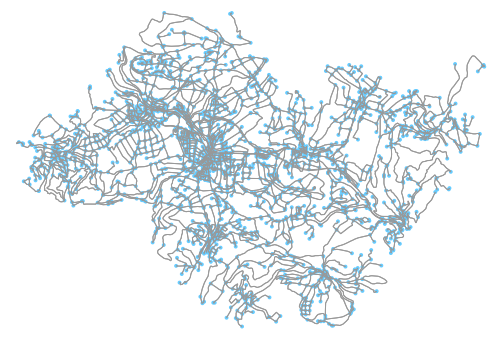

In [7]:
# Plot the streets
fig, ax = ox.plot_graph(graph)


Link for amenities:
https://wiki.openstreetmap.org/wiki/Key:amenity#Healthcare

In [8]:
#new query for all buildings in place of interest data similar but not identical...
buildings = ox.footprints_from_place(places[picked][0])
#separation to get all shops for nicer visualization
shop = buildings[buildings['shop'].notnull()]


In [9]:
#col_names has all the important building information columns that could be of interest for gerda
col_names=['amenity','shop','building','leisure', 'sport', 'office']
list_cols=[]
#loop to find the columns actually in buildings dataframe and their unique value
for x in col_names:
    try:
        blup = buildings[buildings[x].notnull()]
        if isinstance(blup[x].iloc[0], list ) | isinstance(blup[x].iloc[0], dict ):
            continue
        print(str(x)+' = '+str(list(blup[x].unique())))
        list_cols.append(x)
    except:
        continue
print(list_cols)

amenity = ['place_of_worship', 'community_centre', 'fast_food', 'townhall', 'bank', 'toilets', 'shelter', 'restaurant', 'pub', 'fire_station', 'fuel', 'police', 'car_wash']
shop = ['supermarket', 'car_repair', 'bakery', 'butcher', 'car', 'chemist', 'travel_agency', 'copyshop']
building = ['yes', 'industrial', 'church', 'hangar', 'office', 'garages', 'house', 'commercial', 'roof', 'shed', 'hut', 'garage', 'school', 'hospital', 'residential', 'barn', 'hotel', 'service', 'apartments', 'civic', 'retail', 'warehouse', 'detached', 'semidetached_house', 'kindergarten', 'transformer_tower', 'terrace']
leisure = ['dance']
office = ['forestry', 'government']
['amenity', 'shop', 'building', 'leisure', 'office']


### first visualisation

In [10]:
#make geopandas of place of interest
#whole area
area = ox.gdf_from_place(places[picked][0])
#basically all the ways one can move on !!BEWARE!! to my knowledge also not streets, off track route
nodes, edges = ox.graph_to_gdfs(graph)

#extra just for healthcare for nicer visulisation
healthcare = ['baby_hatch',
             'clinic',
             'dentist',
             'doctors',
             'hospital',
             'nursing_home',
             'pharmacy',
             'social_facility',
             'veterinary']
boish = ox.pois_from_place(places[picked][0], amenities=healthcare)

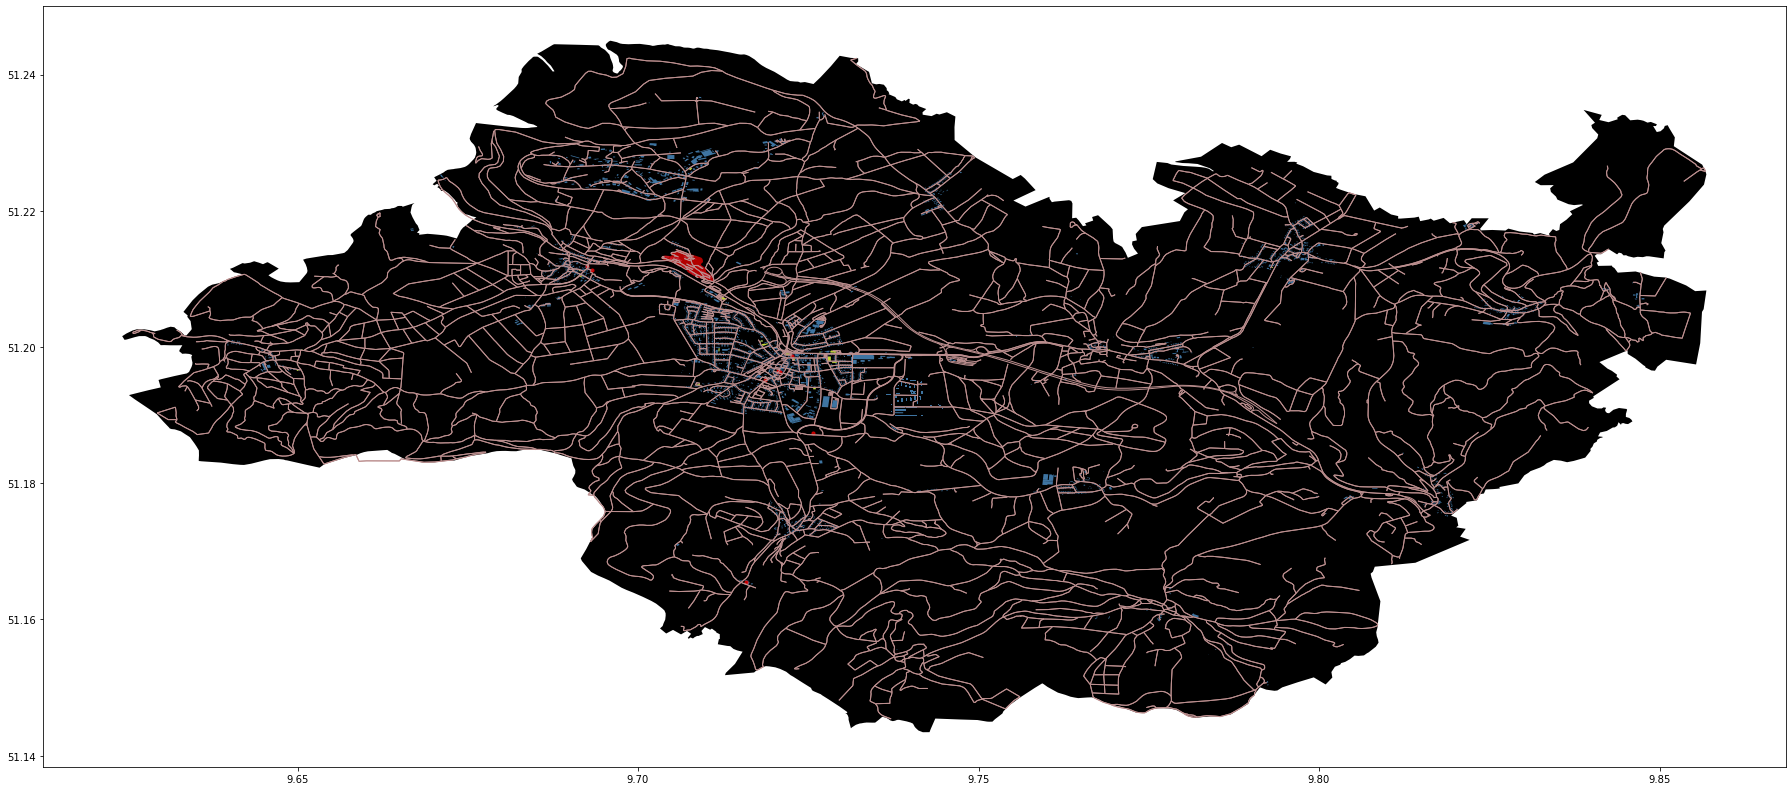

In [11]:
#first little viz
fig, ax = plt.subplots(figsize=(25,16))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings of interest and shops
buildings.plot(ax=ax, facecolor='steelblue', alpha=0.9)
shop.plot(ax=ax, facecolor='yellow', alpha=0.7)

# Plot healthcare
boish.plot(ax=ax, color='red', alpha=0.7, markersize=10)

plt.tight_layout()


In [12]:
#list of healthcare facilities
boish

,osmid,geometry,addr:housenumber,addr:postcode,addr:street,amenity,emergency,name,toilets:wheelchair,wheelchair,...,dispensing,healthcare,operator,phone,website,healthcare:speciality,nodes,building,social_facility,social_facility:for
2077989911,2077989911,POINT (9.71579 51.16551),NaN,NaN,NaN,veterinary,NaN,Kleintierpraxis Walbachsmühle,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2077995081,2077995081,POINT (9.72566 51.18731),NaN,NaN,NaN,veterinary,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2109192856,2109192856,POINT (9.72262 51.19872),3,37235,Landgrafenstraße,pharmacy,NaN,Meissner-Apotheke,NaN,yes,...,yes,pharmacy,Herbert Volkmar,+49 5602 93830,https://www.meissner-apotheke.de,NaN,NaN,NaN,NaN,NaN
2109662336,2109662336,POINT (9.72061 51.19647),NaN,NaN,NaN,pharmacy,NaN,Landgrafenapotheke,NaN,limited,...,yes,pharmacy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2109662342,2109662342,POINT (9.72079 51.19638),NaN,37235,Landgrafenstraße,pharmacy,NaN,Stadtapotheke,NaN,no,...,yes,pharmacy,NaN,NaN,http://www.priv-stadt-apotheke.de/,NaN,NaN,NaN,NaN,NaN
2109761485,2109761485,POINT (9.71870 51.19517),NaN,NaN,NaN,doctors,NaN,Dr. Rüdiger Froelich,NaN,limited,...,NaN,doctor,NaN,NaN,NaN,general,NaN,NaN,NaN,NaN
3647848086,3647848086,POINT (9.69245 51.21190),NaN,NaN,NaN,pharmacy,NaN,Apotheke Fürstenhagen,NaN,NaN,...,yes,NaN,Gerhard Peter,+49 5602 2427,NaN,NaN,NaN,NaN,NaN,NaN
3707494740,3707494740,POINT (9.69322 51.21128),NaN,NaN,NaN,dentist,NaN,Drs. Beutler & Schneider,NaN,NaN,...,NaN,NaN,NaN,NaN,http://www.beutler-schneider.de,NaN,NaN,NaN,NaN,NaN
414752958,414752958,"POLYGON ((9.71028 51.20976, 9.70977 51.20989, ...",NaN,37235,Am Mühlenberg,hospital,NaN,Orthopädische Klinik,yes,yes,...,NaN,NaN,NaN,+495602830,http://www.klinik-lichtenau.de,NaN,"[2035522068, 4157877199, 4157877207, 415787720...",NaN,NaN,NaN


In [13]:
#list of all buildings on open street map for this area
buildings

,nodes,building,building:part,name,geometry,addr:housenumber,addr:postcode,addr:street,opening_hours,shop,...,height,object:postcode,object:street,object:village,old_operator,owner,start_date,year_of_construction,members,type
44029570,"[559801840, 559801909, 559801844, 3433469254, ...",yes,hospital,Klinik,"POLYGON ((9.70572 51.21278, 9.70580 51.21286, ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44045779,"[559951576, 559951577, 3676570290, 3676570287,...",yes,NaN,Lidl,"POLYGON ((9.71295 51.20712, 9.71266 51.20691, ...",6-8,37235,Am Lohwasser,Mo-Sa 07:00-20:00,supermarket,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44045780,"[559951579, 559951580, 559951545, 559951546, 5...",yes,NaN,NaN,"POLYGON ((9.71146 51.20698, 9.71126 51.20684, ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44045781,"[559951565, 559951560, 559951561, 559951563, 5...",yes,NaN,NaN,"POLYGON ((9.71024 51.20838, 9.71010 51.20827, ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44045782,"[559951567, 559951564, 559951566, 559951568, 5...",industrial,NaN,NaN,"POLYGON ((9.71063 51.20828, 9.71037 51.20809, ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837917851,"[7820650620, 7820650621, 7820650622, 782065062...",residential,NaN,NaN,"POLYGON ((9.81437 51.18236, 9.81447 51.18242, ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837917852,"[7820650630, 7820650631, 7820650632, 782065063...",residential,NaN,NaN,"POLYGON ((9.81500 51.18214, 9.81513 51.18219, ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837917853,"[7820650634, 7820650635, 7820650636, 782065063...",residential,NaN,NaN,"POLYGON ((9.81472 51.18191, 9.81480 51.18195, ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864573834,"[8058521965, 8058521966, 8058521967, 805852196...",garages,NaN,NaN,"POLYGON ((9.72295 51.20374, 9.72300 51.20379, ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Location assignment as in loaction.py of the gerda model

In [14]:

def assign_location_classifier(df_buildings):
        '''Build reference lists for assign_building_type() from given dataframe.
        Should be produced by read_geodata.py.
        Possible classes and therefore dictionary keys are:
        'excluded_buildings' = buildings not included because they do not fit any class
        'hospital' = hospitals
        'work' = anything a person can work at
        'public' = right now religous and sport buildings #FIXME-Discussion: restaurantes, bars, cafe?
        'school' = places with a lot of young people
        Sorting idea as of right now everything is work place if not in any other list
        : return: location class dictionary loc_class_dic['school'] = ['school','university','kindergarten']

        '''
        loc_class_dic = {}

        loc_class_dic['excluded_buildings'] = ['detached', 'garage', 'roof', 'shed', 'bungalow', 'barn', 'silo']
        loc_class_dic['hospital'] = ['hospital']
        loc_class_dic['morgue'] = ['morgue']
        loc_class_dic['mixing_loc'] = ['mixing_loc']
        
        
        cols = ['amenity', 'shop', 'leisure', 'sport','building']
        for col in cols:
            try:
                list(df_buildings[col].unique())
            except:
                df_buildings[col] = [np.nan]*len(df_buildings)


        loc_class_dic['work'] = ['industrial', 'stable','service', 'greenhouse', 'cowshed', 'commercial', 'warehouse', 'office', 'farm',\
                                 'fire_station', 'farm_auxiliary', 'retail','company']\
            + list(df_buildings['amenity'].unique())\
            + list(df_buildings['shop'].unique())

        # What is a public place or just work place e.g. restaurante, cafe...

        loc_class_dic['public'] = ['public','police','car_wash', 'chapel','place_of_worship', 'hotel', 'church', 'parish_hall', 'townhall','supermarket',\
                                   'grocery_store', 'pub', 'sports_centre','doctors',  'social_facility']\
            + list(df_buildings['leisure'].unique())\
            + list(df_buildings['sport'].unique())

        loc_class_dic['school'] = ['school', 'university', 'kindergarten']
        # Cleaning the list public place of nan
        loc_class_dic['public'] = [x for x in loc_class_dic['public'] if ~pd.isnull(x)]
        # Removing values from workplace_list that are in work place and in another list
        for x in loc_class_dic['hospital'] + [np.nan] + loc_class_dic['public'] + loc_class_dic['school']:
            while x in loc_class_dic['work']:
                loc_class_dic['work'].remove(x)

        return loc_class_dic

def assign_building_type(building_lst: list, loc_class_dic: dict):
    '''set building type according to value in building_lst and where it matches with reference lists

        : return: string with building type
    '''
    # auto assign is home
    building_type = 'home'
    # if any entry of building_lst matches any location class entry: it is assigned to that class
    for key in loc_class_dic:
        if any(elem in loc_class_dic[key] for elem in building_lst):
            building_type = key

    return building_type

## Classify buildings dataframe as in gerda model (not imported as every area has to be looked at)

In [15]:
loc_class_dic = assign_location_classifier(buildings)
buildings['building_type']= buildings.apply(lambda row: assign_building_type(row[col_names].dropna().unique(), loc_class_dic), axis = 1) 

## first check to see building amounts

In [16]:
buildings['building_type'].value_counts()

home                  3562
excluded_buildings     184
work                    60
public                  21
school                  10
hospital                 6
Name: building_type, dtype: int64

In [18]:
import matplotlib.cm as cm 

/home/maxim/anaconda3/envs/ox/lib/python3.8/site-packages/geopandas/plotting.py:529: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Text(0.5, 1.0, 'Hessisch Lichtenau, Werra-Meißner-Kreis, Regierungsbezirk Kassel, Hessen, 37235, Germany')

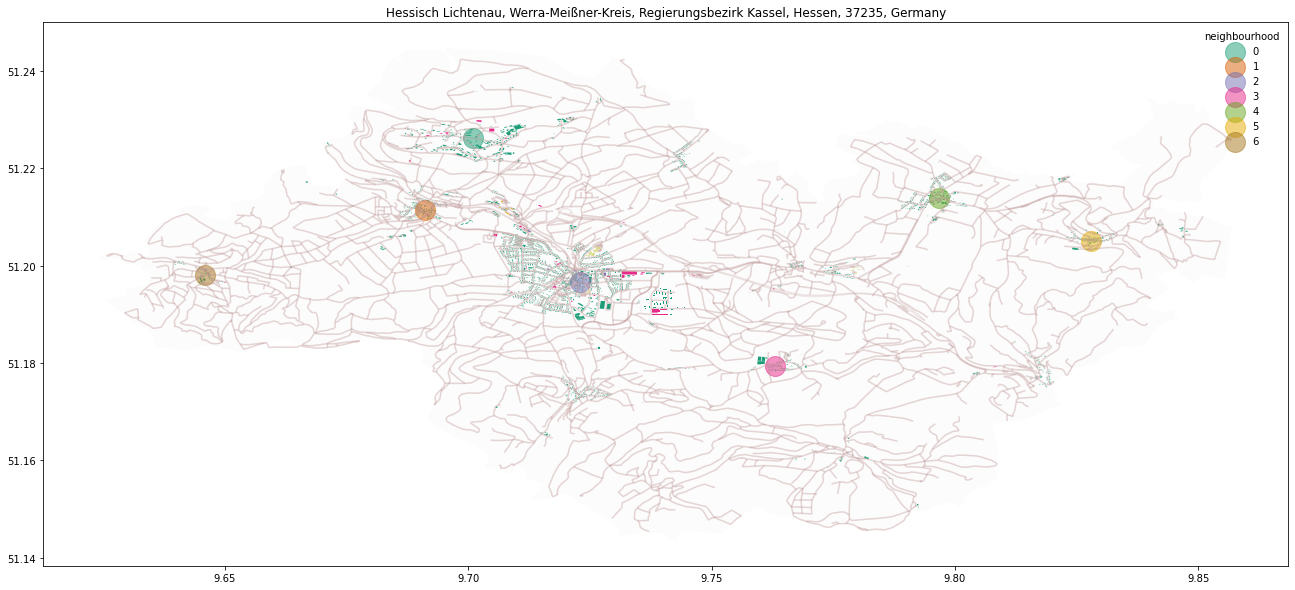

In [29]:
locationsCmap1 = cm.get_cmap('Dark2')  # for our locations
locationsCmap2 = cm.get_cmap('tab20')
locationTypeColors = {
    'home': locationsCmap1(0),  # aquamarine
    'public': locationsCmap1(2),  # purple-blue
    'work': locationsCmap1(3),  # deep pink
    'hospital': locationsCmap1(5),  # mustard yellow
    'school': locationsCmap2(17),  # olive green - khaki
    'morgue': locationsCmap1(7)  # gray
}
plotrange=0.02
neighbourhood = 3
print()


fig, ax = plt.subplots(figsize=(25,10))
ax = plt.subplot()
cmap = cm.get_cmap('Dark2')

area.plot(ax=ax, color='black' ,alpha=0.01)
edges.plot(ax=ax, color='#BC8F8F', alpha=0.2)

for building_type in locationTypeColors:
    buildings[buildings['building_type']==building_type].plot(ax=ax, color=locationTypeColors[building_type], label=building_type, legend=True,legend_kwds={'frameon':False, 'loc':'lower right'})
    #ax.text(max(buildings['building_coordinates_x']),max(buildings['building_coordinates_y']), 'H', c=locationsCmap1(5))
    #ax.text(min(buildings['building_coordinates_x']),min(buildings['building_coordinates_y']), 'M', c=locationsCmap1(7))
    #ax.set_label('s')
    #handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles=[building_type], loc='lower right')
#plt.legend()
list_of_neighbourhood_centers = places[picked][1]
for k,p in enumerate(list_of_neighbourhood_centers):
    ax.scatter(p.x,p.y, color = cmap(k), s=400, alpha=0.5, label=k)
ax.legend(title='neighbourhood', frameon=False)    

plt.title(places[picked][0])

#plt.legend()    
#ax.set_xlim(list_of_neighbourhood_centers[neighbourhood].x-plotrange,list_of_neighbourhood_centers[neighbourhood].x+plotrange)
#ax.set_ylim(list_of_neighbourhood_centers[neighbourhood].y-plotrange,list_of_neighbourhood_centers[neighbourhood].y+plotrange)

### can only be used if .geojson files in the same directory

In [ ]:
place_name = places[picked][0].split(',')[0].replace(' ','_')

In [ ]:
min_area = '0_5' # [1,3] 

area = gpd.read_file('Area_' + place_name + '_MA_'+str(min_area)+'.geojson')
buildings = gpd.read_file('Buildings_' + place_name + '_MA_'+str(min_area)+'.geojson')
streets = gpd.read_file('Streets_' + place_name + '_MA_'+str(min_area)+'.geojson')

### generats plot with loactions colored in neighbourhood 

In [ ]:
import matplotlib.cm as cm 

fig, ax = plt.subplots(figsize=(20,15))
ax = plt.subplot()
cmap = cm.get_cmap('Dark2')

area.plot(ax=ax, color='k' ,alpha=0.01)
streets.plot(ax=ax, color='k', alpha=0.1)
buildings.plot(ax=ax, column='neighbourhood', cmap='Dark2')

for k,p in enumerate(list_of_neighbourhood_centers):
    ax.scatter(p.x,p.y, color = cmap(k), s=400, alpha=0.5, label=k)
ax.legend(title='neighbourhood', frameon=False)    
#plt.title(str(time)+' time ')
